
| OS        |  Status |
| :-------------: |:-------------:|
| Linux       | ![L Py 3.7 - 3.9](https://github.com/maichmueller/scm/workflows/L%20Py%203.7%20-%203.9/badge.svg)    |
| Windows | ![W Py 3.7 - 3.9](https://github.com/maichmueller/scm/workflows/W%20Py%203.7%20-%203.9/badge.svg) |
| Mac | ![M Py 3.7 - 3.9](https://github.com/maichmueller/scm/workflows/M%20Py%203.7%20-%203.9/badge.svg) |

A Python package implementing Structural Causal Models (SCM).

The library uses the CAS library [SymPy](https://github.com/sympy/sympy) to allow the user to state arbitrary assignment functions and noise distributions as supported by SymPy and builds the DAG with [networkx](https://github.com/networkx/networkx).

It supports the features:
  - Sampling
  - Intervening
  - Plotting
  - Printing

 and by extension all methods on a DAG provided by networkx after accessing the member variable dag

# Installation
Git clone the repository and run the setup.py file
```
git clone https://github.com/maichmueller/scm
cd scm
python setup.py install
```

# Example usage

To build the DAG

![X \rightarrow Y \leftarrow Z \rightarrow X](https://latex.codecogs.com/svg.latex?&space;X{\rightarrow}{Y}{\leftarrow}{Z}{\rightarrow}X)


with the assignments

![Z ~ LogLogistic(alpha=1, beta=1)](https://latex.codecogs.com/svg.latex?&space;Z\sim\text{LogLogistic}(\alpha=1,\beta=1))

![X = 3Z^2{\cdot}N](https://latex.codecogs.com/svg.latex?&space;X={3Z^2}{\cdot}N\quad[N=\text{LogNormal}(\mu=1,\sigma=1)])

![Y = 2Z + \sqrt{X} + N](https://latex.codecogs.com/svg.latex?&space;Y=2Z+\sqrt{X}+N\quad[N=\text{Normal}(\mu=2,\sigma=1)])

one can describe the assignments as strings

In [1]:
from scm import SCM

myscm = SCM(
    [
        "Z = N, N ~ LogLogistic(alpha=1, beta=1)",
        "X = N * 3 * Z ** 2, N ~ LogNormal(mean=1, std=1)",
        "Y = N + 2 * Z + sqrt(X), N ~ Normal(mean=2, std=1)"
    ]
)

or build the assignments piecewise themselves via an assignment map

In [2]:
from sympy.stats import LogLogistic, LogNormal, Normal


assignment_map = {
   "Z": (
       "N",
       LogLogistic("N", alpha=1, beta=1)
   ),
   "X": (
       "N * 3 * Z ** 2",
       LogNormal("N", mean=1, std=1),
   ),
   "Y": (
       "N + 2 * Z + sqrt(X)",
       Normal("N", mean=2, std=1),
   ),
}

myscm = SCM(assignment_map)

The SCM supports a form of pretty printing its current setup, which includes mentioning active interventions
and the assignments

In [3]:
print(myscm)

Structural Causal Model of 3 variables: Z, X, Y
Following variables are actively intervened on: []
Current Assignments are:
Z := f(N) = N	 [ N ~ LogLogistic(alpha=1, beta=1) ]
X := f(N, Z) = N * 3 * Z ** 2	 [ N ~ LogNormal(mean=1, std=1) ]
Y := f(N, Z, X) = N + 2 * Z + sqrt(X)	 [ N ~ Normal(mean=2, std=1) ]


One can easily perform interventions on the variables, e.g. a Do-intervention ![\text{do}(X=1=)](https://latex.codecogs.com/svg.latex?&space;\text{do}(X=1))

In [4]:
myscm.do_intervention(["X"], [1])

and sample as many samples from it as desired

In [5]:
myscm.sample(5)

C:\Users\Michael\.conda\envs\py38\lib\site-packages\sympy\stats\rv.py:1092: UserWarning: 
The return type of sample has been changed to return an iterator
object since version 1.7. For more information see
https://github.com/sympy/sympy/issues/19061
  warnings.warn(filldedent(message))


,X,Z,Y
0,1,1.179145,5.179133
1,1,5.065117,14.378224
2,1,0.231200,2.656906
3,1,0.596879,3.695645
4,1,1.183835,5.702240


The current intervention is also noted in its string representation

In [6]:
print(myscm)

Structural Causal Model of 3 variables: Z, X, Y
Following variables are actively intervened on: ['X']
Current Assignments are:
Z := f(N) = N	 [ N ~ LogLogistic(alpha=1, beta=1) ]
X := f(N) = 1	 [ N ~ LogNormal(mean=1, std=1) ]
Y := f(N, Z, X) = N + 2 * Z + sqrt(X)	 [ N ~ Normal(mean=2, std=1) ]


which can be restored to the initial status via undoing the intervention

In [13]:
myscm.undo_intervention()

If you have graphviz installed, you can also use it to plot the DAG easily

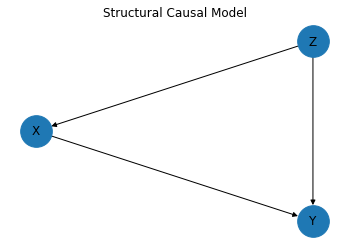

In [20]:
myscm.plot(node_size=1000, alpha=1)